# **Google Colab Project: Rock-Scissors-Paper Game**  
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# **Outline**
- [ 1. Set-up Environment ](#1)
- [ 2. Scissor-Rock-Paper Game ](#2)
  - [ 2.1. Data](#2.1)
  - [ 2.2. Capture image from the webcam in Colab function ](#2.2)
  - [2.3. Rock-Scissors-Paper Game with Hand Gesture Recognition](#2.3)
  - [2.4. Play Game!](#2.1)
- [ 3. Conclusion ](#3)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



# **1. Set-up Environment**

In [5]:
!pip install mediapipe opencv-python-headless protobuf==3.20.3
# This installs the necessary dependencies for hand gesture recognition.

INFO: pip is looking at multiple versions of mediapipe to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 785.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **2. Game**






## **2.1. Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img_path = "/content/drive/MyDrive/miniProject/ScissorRockPaper/pic"

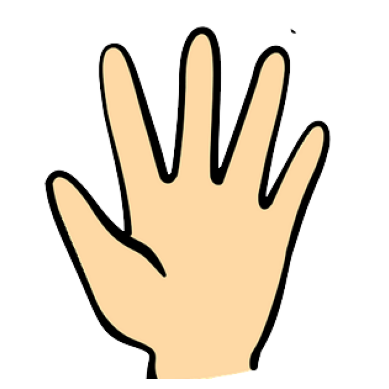

In [9]:
import matplotlib.pyplot as plt
import cv2

img_path = "/content/drive/MyDrive/miniProject/ScissorRockPaper/pic/0_paper.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

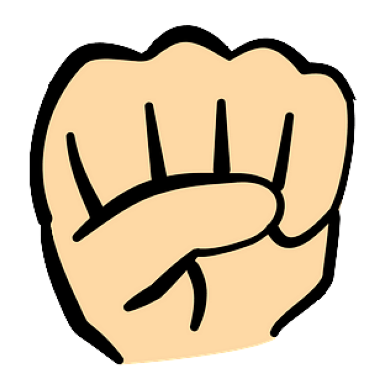

In [10]:
import matplotlib.pyplot as plt
import cv2

img_path = "/content/drive/MyDrive/miniProject/ScissorRockPaper/pic/1_rock.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

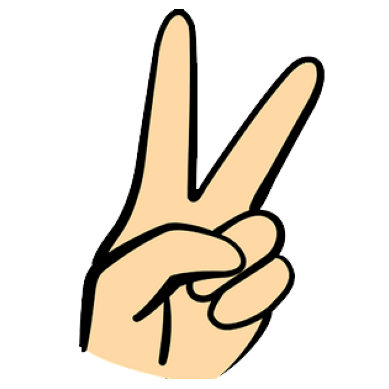

In [11]:
import matplotlib.pyplot as plt
import cv2

img_path = "/content/drive/MyDrive/miniProject/ScissorRockPaper/pic/2_scissor.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

## **2.2. Capture image from the webcam in Colab function**

In [23]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

def capture_image():
    js = Javascript('''
        async function takePhoto() {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = '📸 Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize video to square for consistent view
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          // Wait for capture
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getTracks().forEach(t => t.stop());
          div.remove();

          return canvas.toDataURL('image/png');
        }
        takePhoto();
    ''')
    display(js)
    data = eval_js("takePhoto()")
    binary = b64decode(data.split(',')[1])
    with open("photo.png", "wb") as f:
        f.write(binary)

    img = cv2.imdecode(np.frombuffer(binary, np.uint8), cv2.IMREAD_COLOR)
    return img

- This code will capture a frame from the webcam, process it, and return an OpenCV image.

**To capture video from the webcam in Google Colab, you can use a combination of JavaScript and Python. Here's how the process works:**

- **JavaScript for capturing image:**
  - The JavaScript code utilizes ``navigator.mediaDevices.getUserMedia()`` to access the webcam and stream the video.
  - It then creates a ``<canvas>`` element to capture frames from the video feed when the user clicks the capture button.
- **Display the image and trigger capture:**
  - The video is displayed in the notebook, and the user can capture the frame by clicking the "Capture" button.
  - After capturing, the canvas content is converted to a base64 image format and sent back to Python.
- **Python processing:**
  - The base64 image data is decoded and converted into a format suitable for processing in OpenCV (i.e., as a NumPy array).
  - This allows you to use the captured image for further tasks like object detection, hand tracking, or image analysis.

## **2.3. Rock-Scissors-Paper Game with Hand Gesture Recognition**
- use ``mediapipe`` for hand tracking to detect the number of fingers raised

In [31]:
# Import Libraries
import cv2
import mediapipe as mp
import numpy as np
import os
import random
from google.colab.patches import cv2_imshow

# Setup image folder path
IMG_DIR = "/content/drive/MyDrive/miniProject/ScissorRockPaper/pic"

# Define Hand Tracking Class
class HandTracker:
    def __init__(self, max_hands=1, detection_conf=0.7, track_conf=0.7):
        self.mp_hands = mp.solutions.hands
        self.hands = self.mp_hands.Hands(
            max_num_hands=max_hands,
            min_detection_confidence=detection_conf,
            min_tracking_confidence=track_conf
        )
        self.drawer = mp.solutions.drawing_utils

    def findHands(self, frame):
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = self.hands.process(image_rgb)
        landmarks = []
        if results.multi_hand_landmarks:
            hand = results.multi_hand_landmarks[0]
            self.drawer.draw_landmarks(frame, hand, self.mp_hands.HAND_CONNECTIONS)
            h, w, _ = frame.shape
            for idx, lm in enumerate(hand.landmark):
                cx, cy = int(lm.x * w), int(lm.y * h)
                landmarks.append([idx, cx, cy])
        return frame, landmarks

    def count_finger(self, landmarks):
        if not landmarks:
            return -1
        tip_ids = [4, 8, 12, 16, 20]
        fingers = 0
        if landmarks[tip_ids[0]][1] < landmarks[tip_ids[0]-1][1]:  # Thumb: x comparison
            fingers += 1
        for i in range(1, 5):  # Other fingers: y comparison
            if landmarks[tip_ids[i]][2] < landmarks[tip_ids[i]-2][2]:
                fingers += 1
        return fingers

# Load image and play game
def draw_results(base_img, user_draw):
    com_draw = random.randint(0, 2)
    result_img = base_img.copy()

    # Load and resize user image
    user_img = cv2.imread(os.path.join(IMG_DIR, f"{user_draw}_{['paper','rock','scissor'][user_draw]}.png"))
    user_img = cv2.resize(user_img, (240, 240))  # <-- Resize tại đây

    # Load and resize computer image
    com_img = cv2.imread(os.path.join(IMG_DIR, f"{com_draw}_{['paper','rock','scissor'][com_draw]}.png"))
    com_img = cv2.resize(com_img, (240, 240))  # <-- Resize tại đây

    # Draw labels
    result_img = cv2.putText(result_img, 'You', (50, 50), cv2.FONT_HERSHEY_SIMPLEX,
                             1, (0, 255, 0), 2, cv2.LINE_AA)
    result_img[100:340, 50:290] = user_img

    result_img = cv2.putText(result_img, 'Computer', (400, 50), cv2.FONT_HERSHEY_SIMPLEX,
                             1, (0, 0, 255), 2, cv2.LINE_AA)
    result_img[100:340, 400:640] = com_img

    # Determine result
    if user_draw == com_draw:
        result = "DRAW!"
    elif (user_draw == 0 and com_draw == 1) or \
         (user_draw == 1 and com_draw == 2) or \
         (user_draw == 2 and com_draw == 0):
        result = "YOU WIN!"
    else:
        result = "YOU LOSE!"

    result_img = cv2.putText(result_img, result, (50, 550), cv2.FONT_HERSHEY_SIMPLEX,
                             1.2, (255, 0, 255), 3, cv2.LINE_AA)
    return result_img

# Load image to simulate detection
test_image_path = "/content/drive/MyDrive/miniProject/ScissorRockPaper/pic/0_paper.png"  # Replace with actual image
frame = cv2.imread(test_image_path)



frame = cv2.resize(frame, (640, 640))
frame = cv2.resize(frame, (640, 640))
tracker = HandTracker()
frame, lms = tracker.findHands(frame)
fingers = tracker.count_finger(lms)

# Convert number of fingers to gesture
gesture_map = {0: 1, 2: 2, 5: 0}  # Rock, Scissors, Paper
user_draw = gesture_map.get(fingers, -1)

if user_draw == -1:
    print("🖐️ Chỉ chấp nhận Rock (0 finger), Scissors (2 fingers), hoặc Paper (5 fingers)")
else:
    result_frame = draw_results(frame, user_draw)
    cv2_imshow(result_frame)

🖐️ Chỉ chấp nhận Rock (0 finger), Scissors (2 fingers), hoặc Paper (5 fingers)


## **2.4. Play Game!**
- Integrate everything to detect gestures and compare them with a computer's random selection:

In [32]:
# Capture an image from the webcam
frame = capture_image()

# Resize the image and perform hand detection
frame = cv2.resize(frame, (640, 640))
tracker = HandTracker()
frame, lms = tracker.findHands(frame)
fingers = tracker.count_finger(lms)

# Switch to rock-scissor-paper gesture"
gesture_map = {0: 1, 2: 2, 5: 0}  # Rock, Scissors, Paper
user_draw = gesture_map.get(fingers, -1)

if user_draw == -1:
    print("🖐️ Chỉ chấp nhận Rock (0 finger), Scissors (2 fingers), hoặc Paper (5 fingers)")
else:
    result_frame = draw_results(frame, user_draw)
    cv2_imshow(result_frame)

<IPython.core.display.Javascript object>

🖐️ Chỉ chấp nhận Rock (0 finger), Scissors (2 fingers), hoặc Paper (5 fingers)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **3. Conclusion**
This project demonstrates how to create a Rock-Scissors-Paper Game where the game outcome is determined by recognizing hand gestures using a webcam in Google Colab. The ``mediapipe`` library tracks hand landmarks, and ``opencv`` processes the captured frames to detect gestures.